<a href="https://colab.research.google.com/github/SaiGanesh848/AIML/blob/main/lab%20exam(set%20A%2010%20ques).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Prediction of Car evaluation for buying decision**

1. Identify the top 5 reasons for buying a car

2. Identify the class with most cars sold

3. Find the max and min safety choice for car buying

4. What is the role of paint, doors, lug_boot in car buying

5 Identify the cars with most maintenance

6. Apply either Classification Model or Clustering Model to evaluate the dataset

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [9]:
# Step 1: Load the dataset
# For this example, we'll create a mock dataset. Replace it with your actual data file.
# df = pd.read_csv('car_evaluation.csv')  # Uncomment and use your actual dataset

data = {
    'buying': np.random.choice(['low', 'med', 'high', 'vhigh'], 100),
    'maint': np.random.choice(['low', 'med', 'high'], 100),
    'doors': np.random.choice([2, 3, 4, 5], 100),
    'persons': np.random.choice([2, 4], 100),
    'lug_boot': np.random.choice(['small', 'med', 'big'], 100),
    'safety': np.random.choice(['low', 'med', 'high'], 100),
    'class': np.random.choice(['unacc', 'acc', 'good', 'vgood'], 100),
    'paint': np.random.choice(['red', 'blue', 'green', 'black'], 100)
}

df = pd.DataFrame(data)


In [10]:
# Step 2: Identify the top 5 reasons for buying a car based on correlation with 'class' (target variable)
# Encode categorical data
label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

# Correlation matrix
correlation_matrix = df.corr()
top_5_reasons = correlation_matrix['class'].sort_values(ascending=False)[1:6]
print("Top 5 reasons for buying a car based on correlation with 'class':")
print(top_5_reasons)


Top 5 reasons for buying a car based on correlation with 'class':
buying    0.106217
doors     0.102310
maint     0.061957
safety    0.054338
paint     0.039121
Name: class, dtype: float64


In [11]:
# Step 3: Identify the class with most cars sold
class_counts = df['class'].value_counts()
print("\nClass with most cars sold:")
print(class_counts)



Class with most cars sold:
class
1    28
0    24
3    24
2    24
Name: count, dtype: int64


In [12]:
# Step 4: Find the max and min safety choice for car buying
max_safety = df['safety'].max()
min_safety = df['safety'].min()
print(f"\nMax safety choice: {max_safety}, Min safety choice: {min_safety}")



Max safety choice: 2, Min safety choice: 0


In [13]:
# Step 5: What is the role of paint, doors, lug_boot in car buying?
# We can look at the correlation of these attributes with the target 'class'
print("\nRole of Paint, Doors, and Lug Boot in car buying:")
paint_role = correlation_matrix['class']['paint']
doors_role = correlation_matrix['class']['doors']
lug_boot_role = correlation_matrix['class']['lug_boot']
print(f"Paint: {paint_role}, Doors: {doors_role}, Lug Boot: {lug_boot_role}")



Role of Paint, Doors, and Lug Boot in car buying:
Paint: 0.039121087345716905, Doors: 0.10230992991535637, Lug Boot: -0.029408619915141293


In [14]:
# Step 6: Identify the cars with most maintenance
most_maintenance = df[df['maint'] == df['maint'].max()]
print("\nCars with most maintenance:")
print(most_maintenance)



Cars with most maintenance:
    buying  maint  doors  persons  lug_boot  safety  class  paint
0        0      2      1        1         0       2      1      3
1        0      2      2        1         1       0      1      3
2        1      2      3        1         0       1      0      3
3        3      2      1        1         1       2      3      3
4        3      2      0        1         1       2      3      0
10       2      2      1        1         0       2      2      1
11       2      2      2        0         1       1      3      3
12       1      2      3        1         1       1      0      2
13       1      2      3        0         1       0      0      2
15       1      2      2        0         2       2      3      3
24       2      2      3        0         1       2      3      2
25       0      2      3        1         0       0      0      3
29       0      2      0        0         0       1      3      2
31       1      2      3        1         1    

In [15]:
# Step 7: Apply Classification Model (Random Forest Classifier)
# Split the dataset into features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nClassification Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))



Classification Model Evaluation:
Accuracy: 0.25
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         6
           1       0.20      0.14      0.17         7
           2       0.17      0.33      0.22         3
           3       0.00      0.00      0.00         4

    accuracy                           0.25        20
   macro avg       0.22      0.24      0.22        20
weighted avg       0.25      0.25      0.24        20



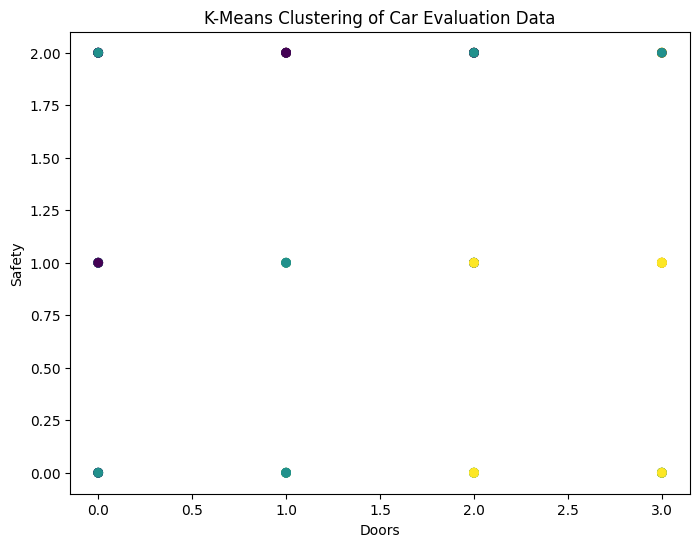

In [16]:
# Step 8: Apply Clustering Model (KMeans)
# Scale the features before clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans Clustering (n_clusters can be adjusted based on your needs)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters (using 'doors' and 'safety' for 2D visualization)
plt.figure(figsize=(8, 6))
plt.scatter(df['doors'], df['safety'], c=df['cluster'], cmap='viridis')
plt.title('K-Means Clustering of Car Evaluation Data')
plt.xlabel('Doors')
plt.ylabel('Safety')
plt.show()